In [2]:
#imports
#
import os
#os.environ['FLUIDSYNTH_LIB'] = r'C:\tools\fluidsynth\bin\libfluidsynth-3.dll'
import numpy as np
import h5py # for HDF5 file handling
#!pip install librosa
import librosa # for audio processing
import mido # for MIDI file processing
import DataLoadingConfig as config
#!pip install note_seq
import note_seq
#!pip install pretty_midi
import pretty_midi
import matplotlib.pyplot as plt

c:\ProgramData\Anaconda\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\ProgramData\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\ProgramData\Anaconda\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
C:\Users\jespe\AppData\Local\Temp\ipykernel_8888\4045864716.py:21: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(p

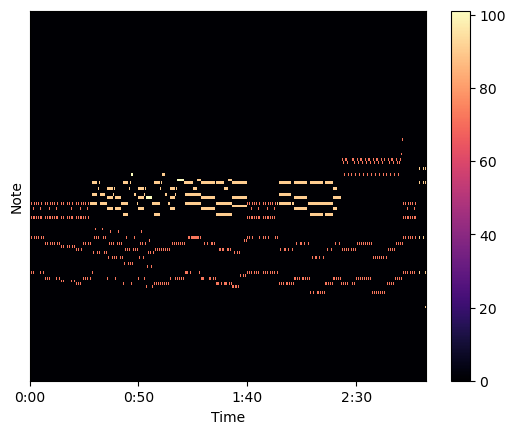

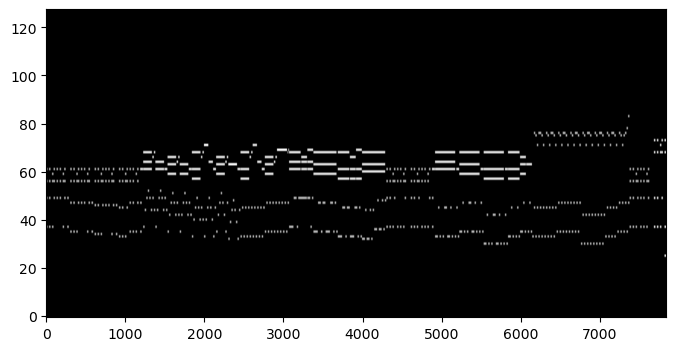

Track 0: Piano 
MetaMessage('track_name', name='Piano\x00', time=0)
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('key_signature', key='E', time=0)
MetaMessage('set_tempo', tempo=384615, time=0)
control_change channel=0 control=121 value=0 time=0
program_change channel=0 program=0 time=0
control_change channel=0 control=7 value=100 time=0
control_change channel=0 control=10 value=64 time=0
control_change channel=0 control=91 value=0 time=0
control_change channel=0 control=93 value=0 time=0
MetaMessage('midi_port', port=0, time=0)
note_on channel=0 note=56 velocity=72 time=0
note_on channel=0 note=61 velocity=72 time=0
note_on channel=0 note=56 velocity=0 time=239
note_on channel=0 note=61 velocity=0 time=0
note_on channel=0 note=56 velocity=72 time=241
note_on channel=0 note=61 velocity=72 time=0
note_on channel=0 note=56 velocity=0 time=239
note_on channel=0 note=61 velocity=0 time=0
note_on channel=0 

In [ ]:
#display a midi using pretty_midi

def display_midi(midi_path):
    pm = pretty_midi.PrettyMIDI(midi_path)
    # Display a piano roll
    piano_roll = pm.get_piano_roll()
    plt.figure(figsize=(8, 4))
    plt.imshow(piano_roll, origin="lower", aspect="auto", cmap="gray")
    plt.show()

#display a midi using note_seq
def display_midi_note_seq(midi_path):
    sequence = note_seq.midi_file_to_note_sequence(midi_path)
    note_seq.plot_sequence(sequence)
    plt.show()

#display a midi using librosa
def display_midi_librosa(midi_path):
    midi_data = pretty_midi.PrettyMIDI(midi_path)
    piano_roll = midi_data.get_piano_roll()
    librosa.display.specshow(piano_roll, x_axis='time', y_axis='cqt_note')
    plt.colorbar()
    plt.show()

#display a midi using mido

def display_midi_mido(midi_path):
    mid = mido.MidiFile(midi_path)
    for i, track in enumerate(mid.tracks):
        print('Track {}: {}'.format(i, track.name))
        for msg in track:
            print(msg)

mini_midi_path = "minimidi.mid"

#display_midi_note_seq(mini_midi_path)
display_midi_librosa(mini_midi_path) #a bit wierd, uses heatmap to map notes
display_midi(mini_midi_path) #display note on the left
display_midi_mido(mini_midi_path) #prints midi output as "note_on channel=0 note=56 velocity=72 time=241"